# DATA_620:Project_2

YouTube Presentation: 



Data Source: NASA Astrophysics Data System (https://ui.adsabs.harvard.edu/)

NASA Astrophysics Data has the affiliations between authors and their journals. This data set is a large 2-node network data set which has the information of Journal name and Author name of publication. For example, there are two or more journal for one publications. The primary objective of this project is to use clustering techniques such as the island method. With the help of the method we will to try to find small sub-networks/subgroups of important authors that are frequently collaborating together. We will also see which journals stand out as main points for these types of collaborations.


In [71]:
import networkx as nx
import os
import ads as ads 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite as bi
import math

plt.figure(figsize = (17,8))
%matplotlib inline

In [82]:
os.environ["ADS_DEV_KEY"] = "kNUoTurJ5TXV9hsw9KQN1k8wH4U0D7Oy0CJoOvyw"

In [83]:
ads.config.token = 'ADS_DEV_KEY'

In [84]:
#Searching for papers which are most rated: I have searched here for those journal which have given most stars.
papers1 = list(ads.SearchQuery(q= "stars", sort="citation_count", max_pages=1 ))

In [85]:
# To find the name of the author.
a = []
for i in papers1:
    authors1 = i.author
    a.append(authors1)
author_names = a

In [86]:
# And, then finding the journals of the authors
j = []
for i in papers1:
    journals1 = i.pub
    j.append(journals1)
journals = j

C:\ProgramData\Anaconda3\lib\site-packages\ads\utils.py:31: UserWarning: You are lazy loading attributes via 'pub', and so are making multiple calls to the API. This will impact your overall rate limits.
  UserWarning,


In [87]:
# Now, creating a data frame of author and the journal
df = pd.DataFrame({'Author_Names' : author_names,
 'Journal':journals
  })

In [88]:
# Expanding the data frame (df) with melt
s1 = df.apply(lambda x: pd.Series(x['Author_Names']),axis=1).stack().reset_index(level=1, drop=True)
s1.name = 'Author_Name'
df_m = df.drop('Author_Names', axis=1).join(s1)
df_m.head()

,Journal,Author_Name
0,Nature Materials,"Geim, A. K."
0,Nature Materials,"Novoselov, K. S."
1,Astronomy and Astrophysics,"Shakura, N. I."
1,Astronomy and Astrophysics,"Sunyaev, R. A."
2,The Astrophysical Journal Supplement Series,"Spergel, D. N."


Creating Nodes and Edge for author and the journal from the df_m data set:

In [72]:
#read in nodes
nodes = pd.read_csv("C:/Users/sql_ent_svc/Desktop/DATA_620(Web_Analytics)/Project_2/Nodes.csv", encoding='latin-1')

In [73]:
nodes.head(5)

,Author_Name
0,"Geim, A. K."
1,"Novoselov, K. S."
2,"Shakura, N. I."
3,"Sunyaev, R. A."
4,"Spergel, D. N."


In [74]:
#read in the edge data
edges = pd.read_csv("C:/Users/sql_ent_svc/Desktop/DATA_620(Web_Analytics)/Project_2/Edges.csv", encoding='latin-1')

In [75]:
edges.head(5)

,Journal,Author_Name
0,Nature Materials,"Geim, A. K."
1,Nature Materials,"Novoselov, K. S."
2,Astronomy and Astrophysics,"Shakura, N. I."
3,Astronomy and Astrophysics,"Sunyaev, R. A."
4,The Astrophysical Journal Supplement Series,"Spergel, D. N."


In [88]:
#make graph
g = nx.Graph(name = "NASA_DATA")

In [89]:
node_values = list(nodes.Author_Name.values)

In [90]:
g.add_nodes_from(node_values)

In [91]:
subset = edges[['Author_Name','Journal',]]
edges_tuples = [tuple(x) for x in subset.values]

In [92]:
g.add_edges_from(edges_tuples)

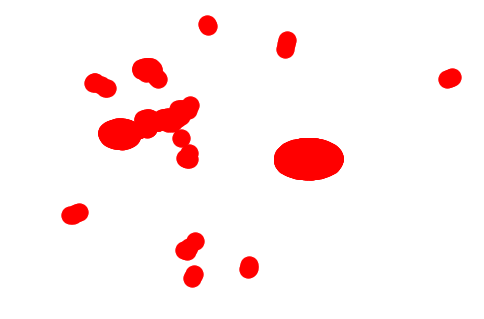

In [93]:
nx.draw_spring(g, with_labels = False)

We can see from the graph above that the NASA Astrophysics Data has the affiliations between authors and their journals. The big red circle represent in the middle that this journal has written by many authors. There are other journal sorrouding by the big red one. But, we can not infer any connection between them from above picture.    


In [36]:
print (nx.info(g))
#print  ("Diameter: " + str(nx.diameter(g)))

Name: Org
Type: Graph
Number of nodes: 1678
Number of edges: 1694
Average degree:   2.0191


The graph has 1678 nodes with 1694 edges (which makes sense since it consists of a Author write many journal for publication). There is a low degree as most Author only have 2 Journal.

In [95]:
label_map = {}
for journal in journal:
    label_map[edges.journal] = journal
for Author_Name in Author_Name:
    Author_Name[Author_Name.index(Author_Name)] = Author_Name.replace(" ", "\n")
    label_map[Author_Name] = Author_Name.replace(" ", "\n")
G = nx.relabel_nodes(G, label_map)

NameError: name 'journal' is not defined

In [ ]:
# Now, I am drawing the plot, with its nodes and edges.
plt.figure(figsize=(10,10))
pos = nx.spring_layout(g,k=0.55,iterations=80)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y)
nx.draw_networkx_labels(g, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(g, pos, edge_color="Gray", alpha=0.4)
nx.draw_networkx_nodes(g, pos, node_color=[color_map[G.node[node]['category']] for node in G], node_size=300)
plt.axis("off")
plt.show()

# Degree of Centrality

In [42]:
degree = nx.degree(g)
degree = dict(list(degree))

In [43]:
print (min(degree.values())) #min = 1
print (max(degree.values() )) #max = 1307

1
1307


In [54]:
sort_degree = sorted(degree.items(), key = lambda k_v: (k_v[0], k_v[1]))

In [56]:
sort_degree[0:20]

[('A Wiley-Interscience Publication', 3),
 ('Abazajian, Kevork N.', 1),
 ('Abbott, B. P.', 1),
 ('Abbott, R.', 1),
 ('Abbott, T. D.', 1),
 ('Abernathy, M. R.', 1),
 ('Acernese, F.', 1),
 ('Ackley, K.', 1),
 ('Adams, C.', 1),
 ('Adams, Fred C.', 1),
 ('Adams, T.', 1),
 ('Addesso, P.', 1),
 ('Adelman-McCarthy, Jennifer K.', 1),
 ('Adhikari, R. X.', 1),
 ('Adya, V. B.', 1),
 ('Affeldt, C.', 1),
 ('Afrough, M.', 1),
 ('Agarwal, B.', 1),
 ('Agathos, M.', 1),
 ('Agatsuma, K.', 1)]

In [61]:
#closeness
closeness = nx.closeness_centrality(g)
sorted(closeness.items(), key = lambda k_v: (k_v[0], k_v[1]))[0:10]

[('A Wiley-Interscience Publication', 0.0017889087656529517),
 ('Abazajian, Kevork N.', 0.0717350931686232),
 ('Abbott, B. P.', 0.389833092233434),
 ('Abbott, R.', 0.389833092233434),
 ('Abbott, T. D.', 0.389833092233434),
 ('Abernathy, M. R.', 0.389833092233434),
 ('Acernese, F.', 0.389833092233434),
 ('Ackley, K.', 0.389833092233434),
 ('Adams, C.', 0.389833092233434),
 ('Adams, Fred C.', 0.03345418498119086)]

In [60]:
#betweenness
betweenness = nx.betweenness_centrality(g)
sorted(betweenness.items(), key = lambda k_v: (k_v[0], k_v[1]))[0:10]

[('A Wiley-Interscience Publication', 2.1347359971992265e-06),
 ('Abazajian, Kevork N.', 0.0),
 ('Abbott, B. P.', 0.0),
 ('Abbott, R.', 0.0),
 ('Abbott, T. D.', 0.0),
 ('Abernathy, M. R.', 0.0),
 ('Acernese, F.', 0.0),
 ('Ackley, K.', 0.0),
 ('Adams, C.', 0.0),
 ('Adams, Fred C.', 0.0)]

In [68]:
#pagerank
pagerank = nx.pagerank(g)
sorted(pagerank.items(), key = lambda k_v: (k_v[0], k_v[1]))[0:5]

[('A Wiley-Interscience Publication', 0.0011431455857709933),
 ('Abazajian, Kevork N.', 0.00031447697536724823),
 ('Abbott, B. P.', 0.00032255787563655416),
 ('Abbott, R.', 0.00032255787563655416),
 ('Abbott, T. D.', 0.00032255787563655416)]

In [55]:
author_nodes = pd.DataFrame(df_m.Author_Name.unique(),columns=['Author_Name'])
author_nodes['node_type'] = 'Author_Name'
journal_nodes = pd.DataFrame(df_m.Journal.unique(), columns=['Journal'])
journal_nodes['node_type'] = 'Journal'

In [56]:
# Building the graph from the node sets and edges

a_nodes = list(author_nodes['Author_Name'])
j_nodes = list(journal_nodes['Journal'])
edge_bunch = [tuple(i) for i in df_m.values]

g = nx.Graph()
g.add_nodes_from(a_nodes,node_type='Author_Name', bipartite=0)
g.add_nodes_from(j_nodes,node_type='Journal', bipartite=1)
g.add_edges_from(edge_bunch)

In [57]:
# find the largest most connected graph - 200 as cut-off 
big_subg = [i for i in nx.connected_component_subgraphs(g) if len(i) > 200]
# Largest:
sg_largest = big_subg[0] # largest connected subgraph

In [58]:
# weighted_projections can be applied to this subgraph to separate the two components
Journals,Author_Names = bi.sets(sg_largest) 

# Island Method


Now, I will use the Island method to find more information about our data.  


In [59]:
j_proj_sg_largest = bi.weighted_projected_graph(sg_largest, Journals) #Creating the subgroup of the Journal

In [60]:
a_proj_sg_largest = bi.weighted_projected_graph(sg_largest, Author_Names) #Creating the subgroup of the Author

In [61]:
# Use the Island Method 
j = j_proj_sg_largest.edges(data=True) 
a = a_proj_sg_largest.edges(data=True)

In [62]:
# With a min threshold of edge weight = 1, find the nodes with strong relationships within the sub-graphs. 
# tidy (SNAS Ch. 4) function similar to the one presented in Social Network Analysis Chapter 4. 
def tidy(g, weight):
    g_temp = nx.Graph()
    edge_bunch2 = [i for i in g.edges(data=True) if i[2]['weight'] > weight]    
    g_temp.add_edges_from(edge_bunch2)
    return g_temp

In [63]:
a_sg_island =  tidy(a_proj_sg_largest, 1)
j_sg_island = tidy(j_proj_sg_largest,1)


Degree of centrality of both the island clusters:


In [64]:

# degree centrality of both island clusters
a_degree = nx.degree_centrality(a_sg_island)
j_degree = nx.degree_centrality(j_sg_island)
pd.DataFrame.from_dict(a_degree,orient='index').sort_values(0,ascending=False).head()


,0
The Astrophysical Journal,1.000000
Monthly Notices of the Royal Astronomical Society,0.666667
The Astrophysical Journal Supplement Series,0.666667
The Astronomical Journal,0.333333


In [65]:

pd.DataFrame.from_dict(j_degree,orient='index').sort_values(0,ascending=False).head()


,0
"Heckman, Timothy M.",0.56
"Brinchmann, Jarle",0.56
"White, Simon D. M.",0.56
"Fukugita, Masataka",0.56
"Bender, Ralf",0.40



Examining the connected Subgraphs:


In [66]:
j_connected = [i for i in nx.connected_component_subgraphs(j_proj_sg_largest) if len(i) > 1]
a_connected = [i for i in nx.connected_component_subgraphs(a_proj_sg_largest) if len(i) > 1]

In [67]:
# combining the graphs 
def merge_graph(connected_g):
    g = nx.Graph()
    for h in connected_g:
        g = nx.compose(g,h)
    return g

a_islands = merge_graph(a_connected)
j_islands = merge_graph(j_connected)


Drawing the graph of the Author subgroup:
    

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


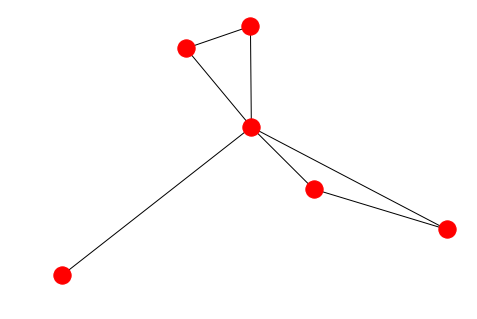

In [68]:
nx.draw(a_islands)


Drawing the graph of the Journal subgroup:
    

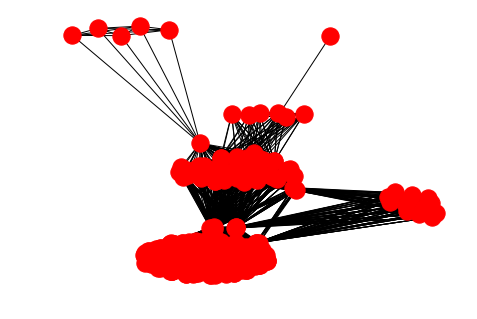

In [70]:
nx.draw(j_islands)
pos=nx.circular_layout(j_islands)

Conclusion:
From the journal island graph we can see that there are few author cluster together with same journal. 
